# 0. Importar bibliotecas e funções 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [2]:
def histplot(data, title=None, xlabel=None, ylabel=None, x=None, y=None, ax=False, nrows=1, ncols=1, figsize=(10, 5), bins='auto', xrotation=None):
  """Gráfico de frequência para a visualização de dados numéricos e categóricos

  Args:
      data (pd.DataFrame): base de dados
      title (str, optional): título do gráfico, opcional. Defaults to None.
      xlabel (str, optional): título do eixo x, opcional. Defaults to None.
      ylabel (str, optional): título do eixo y, opcional. Defaults to None.
      x (str, optional): feature da base de dados para o eixo x. Defaults to None.
      y (str, optional): feature da base de dados para o eixo y. Defaults to None.
      ax (bool, optional): determina se a impressão conterá múltiplos gráficos. Defaults to False.
      nrows (int, optional): quantidade de linhas. Defaults to 1.
      ncols (int, optional): quantidade de colunas. Defaults to 1.
      figsize (tuple, optional): tamanho da impressão. Defaults to (10, 5).
      bins (int, optional): quantidade de bins. Defaults to 10.

  Returns:
      sns.histplot: impressão do gráfico
  """   
  import matplotlib.pyplot as plt
  import seaborn as sns
  
  if ax is True:
    plt.figure(figsize=figsize)
    n = 1
    for x in data.columns:
      plt.subplot(nrows, ncols, n)
      sns.histplot(data[x], bins=bins).set_ylabel(ylabel)
      n += 1
    
    if title is not None:
      plt.suptitle(title)
  
  else:
    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=x, y=y, bins=bins)
    
    if title is not None:
      plt.title(title)
    if xlabel is not None:
      plt.xlabel(xlabel)
    if ylabel is not None:
      plt.ylabel(ylabel)
    if xrotation is not None:
      plt.xticks(rotation = xrotation)      

  return plt.show()

In [3]:
def corrplot(data, vmin= -1, vmax= 1, figsize=(10,7)):
    """Gráfico de correlação com paleta de cores do azul ao vermelho e anotações para melhor entendimento dos dados

    Args:
        data (pd.DataFrame): base de dados para realizar a correlação
        vmin (int, optional): valos mínimo de correlação. Defaults to -1.
        vmax(int, optional): valor máximo de correlação. Defaults to 1.

    Returns:
        sns.heatmap: impressão do gráfico
    """      
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=figsize)

    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    sns.heatmap(data = data.corr(), 
                cmap = cmap, 
                vmin = vmin, 
                vmax = vmax,
                annot=True)

    return plt.show()

In [4]:
def predict_table(y, y_pred, columns=['Real', 'Previsto'], residual=False):
    """Tabela de previsão e cálculo de resíduo do modelo

    Args:
        y (pd.DataFrame): variável resposta
        fit (.predict): predição do modelo ajustado dos regressores
        columns (list): nome das colunas Real e Previsto
        residual (bool, optional): cálculo do residual dos regressores. Defaults to False.

    Returns:
        pred(pd.DataFrame): base com predição do modelo ajustado
    """  
    
    import pandas as pd
    
    pred = pd.concat([y, y_pred], axis=1)
    pred.columns = columns

    if residual is True:
        pred['Res'] = pred[columns[0]] - pred[columns[1]]

    return pred

In [5]:
def adj_quality(pred, index, form=False, reg=None):
    """Qualidade de ajuste do modelo com R² e RMSE

    Args:
        pred (pd.DataFrame): tabela de previsão do modelo

    Returns:
        adj(pd.DataFrame): cálculo de R² e RMSE do modelo
    """    
    import pandas as pd
    import numpy as np
    from sklearn import metrics

    
    if form is True:
        fo = "y = {} + {} x".format(reg.intercept_, reg.coef_[0])
        adj = pd.DataFrame({
        'R²': metrics.r2_score(pred.loc[:, pred.columns[0]], 
                               pred.loc[:, pred.columns[1]]),
        'MSE': metrics.mean_squared_error(pred.loc[:, pred.columns[0]], 
                                          pred.loc[:, pred.columns[1]]),
        'RMSE': np.sqrt(metrics.mean_squared_error(pred.loc[:, pred.columns[0]], 
                                                   pred.loc[:, pred.columns[1]]))
        }, index=[index])
        
        return adj.round(decimals=3), fo
    
    else:
        adj = pd.DataFrame({
            'R²': metrics.r2_score(pred.loc[:, pred.columns[0]], 
                                pred.loc[:, pred.columns[1]]),
            'MSE': metrics.mean_squared_error(pred.loc[:, pred.columns[0]], 
                                            pred.loc[:, pred.columns[1]]),
            'RMSE': np.sqrt(metrics.mean_squared_error(pred.loc[:, pred.columns[0]], 
                                                    pred.loc[:, pred.columns[1]]))
        }, index=[index])
        
        return adj.round(decimals=3)

# 1. Regressão Linear Simples

Quando utilizamos os modelos de Regressão? Quando queremos prever uma variável contínua, isto é, um valor numérico.

Nesse exercício de hoje, iremos aprender um pouco mais sobre a biblioteca [scikit-learn](https://scikit-learn.org/stable/index.html) utilizando um dataset próprio dela para aplicarmos dentro do modelo de Regressão Linear.

Em linhas gerais, o objetivo do exercício é você desenvolver um modelo de Regressão Linear **SIMPLES** 
(Apenas uma variável de entrada X e uma de saída Y) para modelar a precificação de casas em Boston nos Estados Unidos. 

## 1.1. Importar os dados

In [6]:
dataset = load_boston()

c:\Users\bruna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [7]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
boston = pd.DataFrame(dataset.data)
boston.columns = dataset.feature_names
boston['PRICE'] = pd.DataFrame(dataset.target)

## 1.2. Análise Exploratória dos Dados

Você deve escolher quais serão as 3 melhores colunas para utilizarmos através do EDA. Não existem valores nulos.

Feature | Descrição                                                                    | Range         | Tipo
:------ | -----------------------------------------------------------------------      | :-----------: | ------
CRIM    | Taxa de criminalidade per capta por cidade                                   | 0.006 - 88.98 | Numérica
ZN      | Proporção de terrenos residenciais zoneados para lotes acima de 2300 m²      | 0.000 - 100.0 | Numérica
INDUS   | Proporção de acres de negócios não varejistas por cidade                     | 0.460 - 27.74 | Numérica
CHAS    | Se o imóvel está às margens do rio Charles                                   | 0 - 1         | Categórica  
NOX     | Concentração de óxidos nítricos                                              | 0.385 - 0.871 | Numérica
RM      | Quantidade média de quartos por habitação                                    | 3.561 - 8.780 | Numérica
AGE     | Proporção de unidades ocupadas pelos proprietários construídas antes de 1940 | 2.900 - 100.0 | Numérica
DIS     | Distâncias ponderadas para os cinco centros de emprego de Boston             | 1.129 - 12.13 | Numérica
RAD     | Índice de acessibilidade às rodovias radiais                                 | 1 - 24        | Numérica
TAX     | Taxa de imposto de propriedade de valor total (por $ 10.000)                 | 187 - 711     | Numérica
PTRATIO | Proporção aluno-professor por cidade                                         | 12.6 - 22.0   | Numérica
B       | 1000(Bk - 0.63)² Onde Bk é a proporção de pessoas negras por cidade          | 0.320 - 396.9 | Numérica
LSTAT   | % status mais baixo da população                                             | 1.730 - 37.97 | Numérica
PRICE   | Preço das casas                                                              | 5 - 50        | Target

In [9]:
boston.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.027910,0.082045,0.25651,3.677083,10.7530,41.37033,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.000000,0.00000,12.500000,42.5000,90.00000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,2.180000,5.190000,9.69000,18.100000,19.5800,25.65000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000,1.00000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.409250,0.449000,0.53800,0.624000,0.7130,0.87100,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.314000,5.885500,6.20850,6.623500,7.1515,8.33500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,17.725000,45.025000,77.50000,94.075000,98.8000,100.00000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,1.461975,2.100175,3.20745,5.188425,6.8166,9.22277,12.1265
RAD,506.0,9.549407,8.707259,1.00000,2.000000,4.000000,5.00000,24.000000,24.0000,24.00000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,222.000000,279.000000,330.00000,666.000000,666.0000,666.00000,711.0000


In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 1.2.1. Distribuição das variáveis

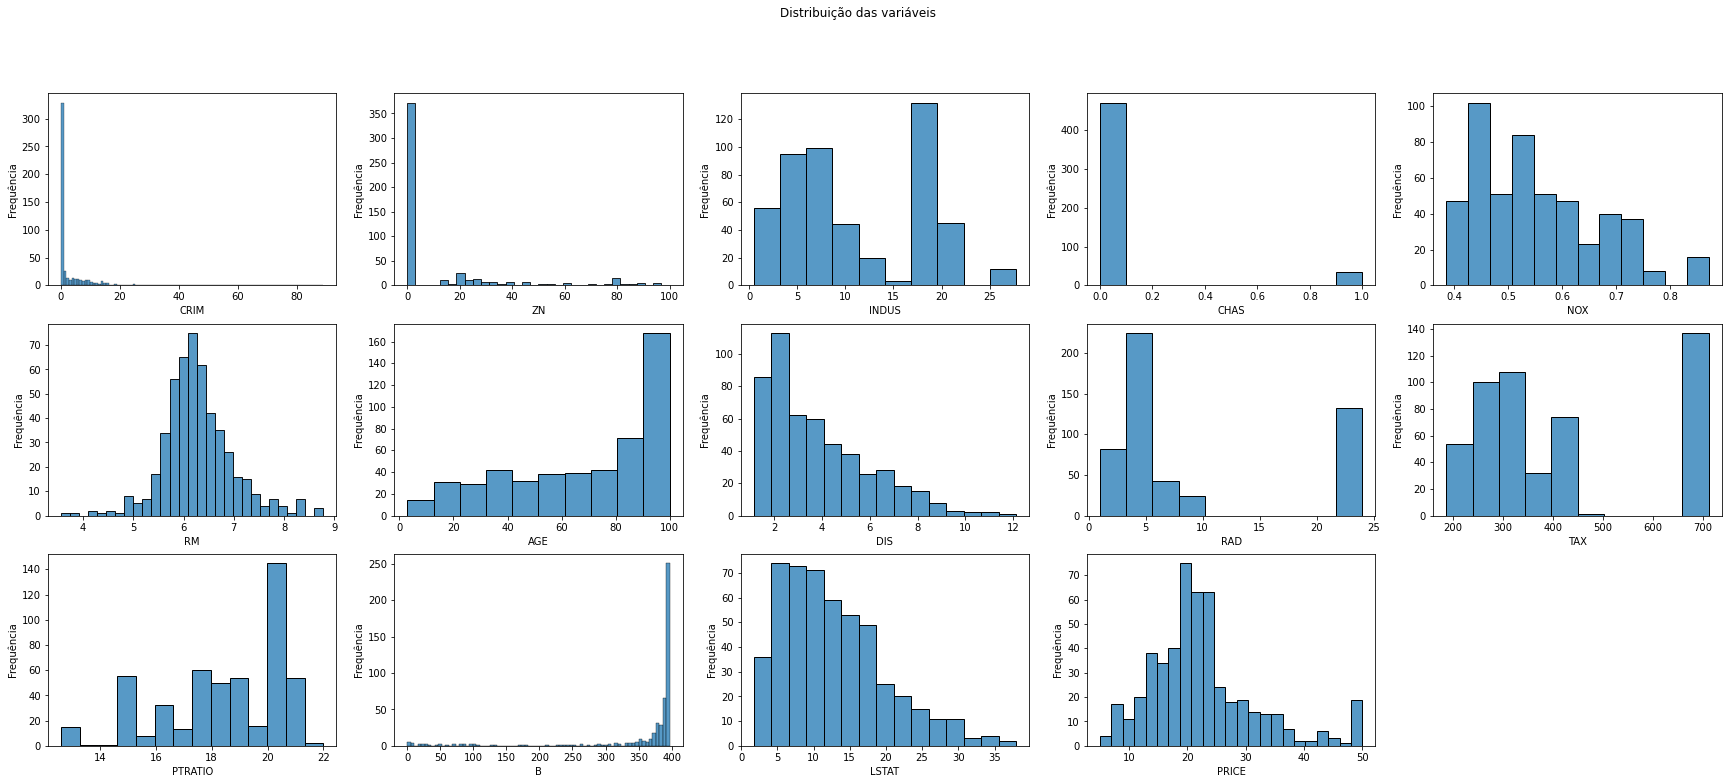

In [11]:
histplot(data=boston, 
         nrows=3, ncols=5, ax=True, 
         ylabel='Frequência', title='Distribuição das variáveis',
         figsize=(30,12))

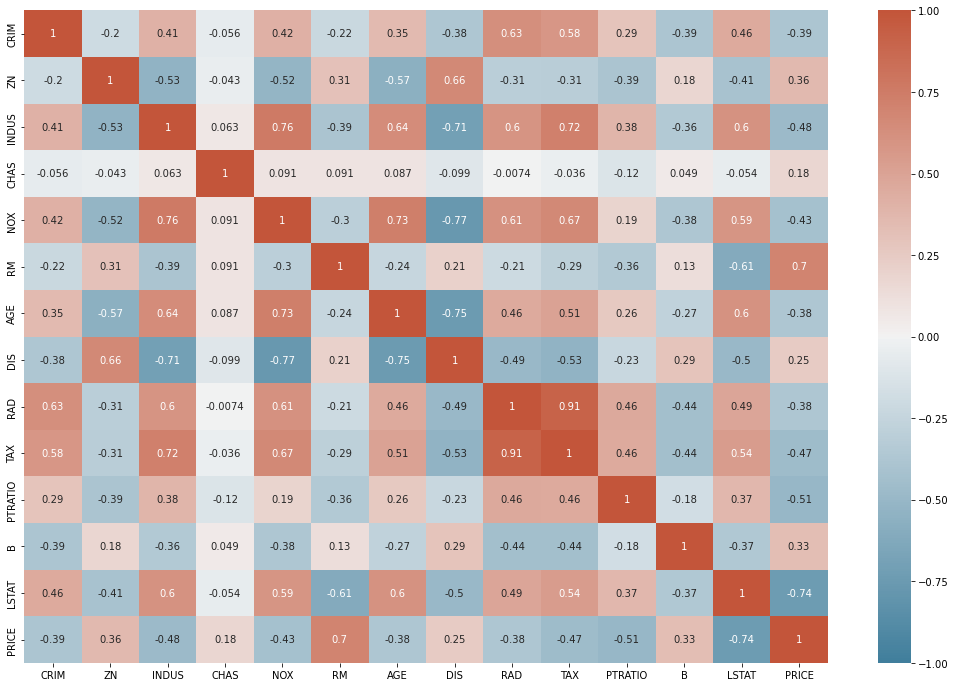

In [12]:
corrplot(boston, figsize=(18,12))

### 1.2.2. Escolha dos atributos

Os atributos que tiveram maior correlação com a variável **Target**, foram:

Atributo | Corr
-------- | ----:
LSTAT    | -0.74
PTRATIO  | -0.51
RM       |  0.70

In [13]:
boston.corr()['PRICE'].abs().sort_values(ascending=False).head(4)

PRICE      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
Name: PRICE, dtype: float64

### 1.2.3. Gráfico de dispersão com os valores escolhidos

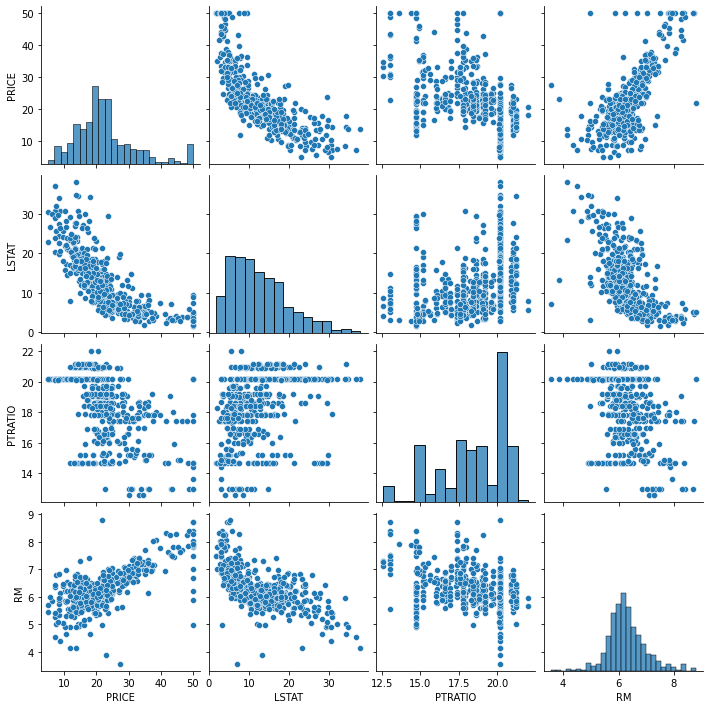

In [14]:
sns.pairplot(boston[['PRICE', 'LSTAT', 'PTRATIO', 'RM']])

## 1.3. Dividir o dataset

In [15]:
x = boston[['LSTAT', 'RM', 'PTRATIO']]
y =  boston['PRICE']

In [16]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.2)

data = (x_Train, x_Test, y_Train, y_Test)

for d in data:
    d.reset_index(drop=True, inplace=True)

In [17]:
x_Train.head()

,LSTAT,RM,PTRATIO
0,5.21,6.430,18.7
1,17.64,6.348,20.2
2,9.64,5.859,16.6
3,5.33,7.147,18.7
4,6.59,6.240,18.6


## 1.4. Treinamento e validação dos modelos
Apenas modelos simples, verificando um X e um Y

### 1.4.1. Treinar o modelo

In [18]:
regLSTAT = LinearRegression().fit(x_Train[['LSTAT']], y_Train)
regPTRATIO = LinearRegression().fit(x_Train[['PTRATIO']], y_Train)
regRM = LinearRegression().fit(x_Train[['RM']], y_Train)

### 1.4.2. Testar o modelo

In [19]:
y_LSTAT = regLSTAT.predict(x_Test[['LSTAT']])
y_PTRATIO = regPTRATIO.predict(x_Test[['PTRATIO']])
y_RM = regRM.predict(x_Test[['RM']])

In [21]:
pred_LSTAT = predict_table(y=y_Test, y_pred=pd.DataFrame(y_LSTAT), residual=True)
pred_LSTAT.head()

,Real,Previsto,Res
0,26.6,29.031480,-2.431480
1,21.4,22.097640,-0.697640
2,16.7,20.394923,-3.694923
3,18.5,17.140843,1.359157
4,21.0,23.270622,-2.270622


In [22]:
pred_PTRATIO = predict_table(y=y_Test, y_pred=pd.DataFrame(y_PTRATIO), residual=True)
pred_PTRATIO.head()

,Real,Previsto,Res
0,26.6,20.061887,6.538113
1,21.4,19.022501,2.377499
2,16.7,19.022501,-2.322501
3,18.5,21.309150,-2.809150
4,21.0,17.359483,3.640517


In [23]:
pred_RM = predict_table(y=y_Test, y_pred=pd.DataFrame(y_RM), residual=True)
pred_RM.head()

,Real,Previsto,Res
0,26.6,28.718531,-2.118531
1,21.4,22.022470,-0.622470
2,16.7,23.875353,-7.175353
3,18.5,16.482168,2.017832
4,21.0,26.287769,-5.287769


### 1.4.3. Qualidade de ajuste

In [27]:
adj_quality(pred_LSTAT, 'LSTAT', form=True, reg=regLSTAT)

(          R²     MSE   RMSE
 LSTAT  0.546  35.489  5.957,
 'y = 34.60314737517323 + -0.9459536731021507 x')

In [25]:
adj_quality(pred_PTRATIO, 'PTRATIO', form=True, reg=regPTRATIO)

(            R²     MSE   RMSE
 PTRATIO  0.362  49.871  7.062,
 'y = 61.01369374805721 + -2.078771924233454 x')

In [26]:
adj_quality(pred_RM, 'RM', form=True, reg=regRM)

(       R²    MSE   RMSE
 RM  0.518  37.62  6.133,
 'y = -34.93073211404351 + 9.172685211060957 x')

### 1.4.4. Visualização do modelo

Text(0.5, 1.0, 'Avaliação da homoscedasticidade da previsão RM x PRICE')

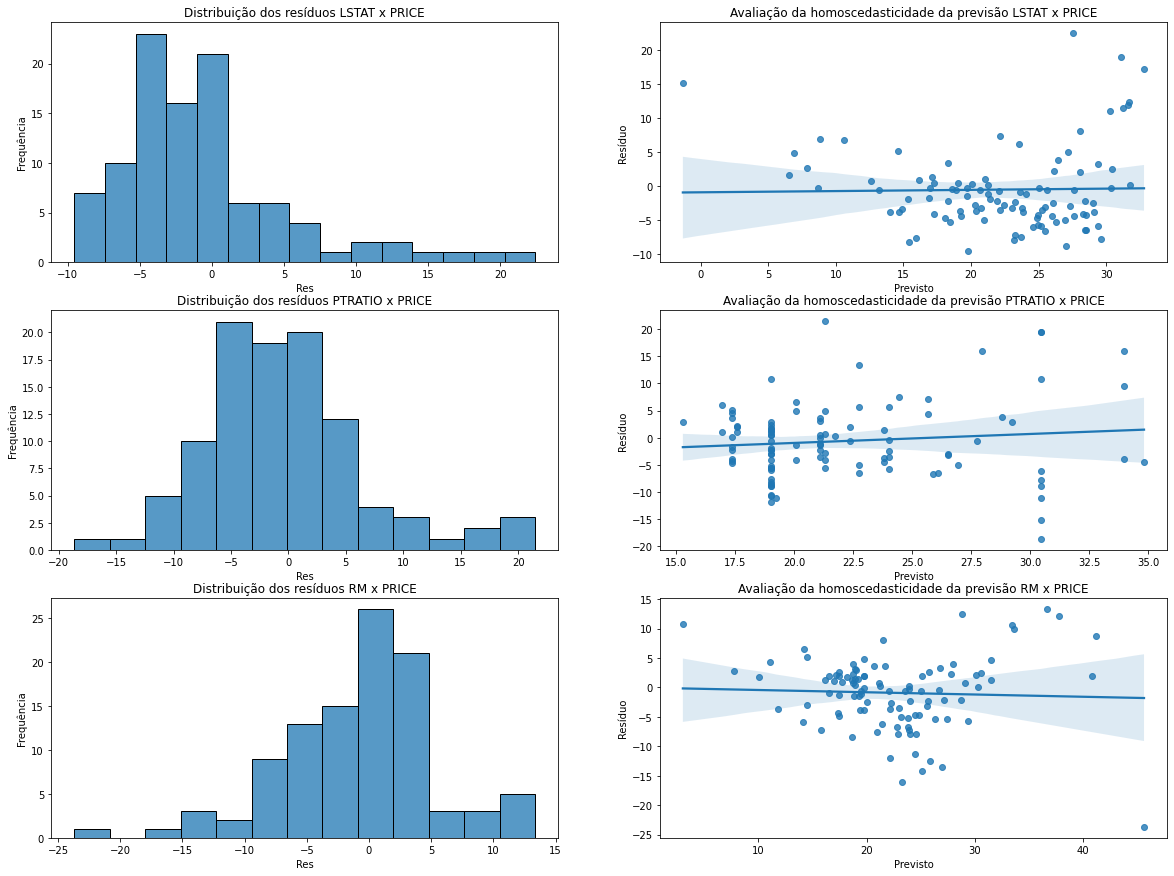

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(20,15))

sns.histplot(data=pred_LSTAT, x='Res', ax=axes[0,0]).set_ylabel('Frequência')
axes[0,0].set_title('Distribuição dos resíduos LSTAT x PRICE')

sns.regplot(data=pred_LSTAT, x='Previsto', y='Res', ax=axes[0,1]).set_ylabel('Resíduo')
axes[0,1].set_title('Avaliação da homoscedasticidade da previsão LSTAT x PRICE')


sns.histplot(data=pred_PTRATIO, x='Res', ax=axes[1,0]).set_ylabel('Frequência')
axes[1,0].set_title('Distribuição dos resíduos PTRATIO x PRICE')

sns.regplot(data=pred_PTRATIO, x='Previsto', y='Res', ax=axes[1,1]).set_ylabel('Resíduo')
axes[1,1].set_title('Avaliação da homoscedasticidade da previsão PTRATIO x PRICE')


sns.histplot(data=pred_RM, x='Res', ax=axes[2,0]).set_ylabel('Frequência')
axes[2,0].set_title('Distribuição dos resíduos RM x PRICE')

sns.regplot(data=pred_RM, x='Previsto', y='Res', ax=axes[2,1]).set_ylabel('Resíduo')
axes[2,1].set_title('Avaliação da homoscedasticidade da previsão RM x PRICE')

## 1.5. Qual o melhor modelo?

LSTAT, por possuir o maior R² do grupo.

# 2. Regressão Linear Categórica

O dataset de hoje é o [Price Car](https://github.com/rmadan16/LinearRegression_CarPrice). Um dataset disponibilizado por [Rohit Madan](https://medium.com/@madanflies/linear-regression-on-carprice-dataset-or-encoding-a-categorical-dataset-in-linear-regression-7378f207e5c1). Para importar ele, basta utilizar o link: https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv'.

Ele contém a informação sobre a venda de carros usados e informações do carro como:
- Nome do carro
- Tipo de Combustível
- Número de portas
- Comprimento / Largura / Altura
- Outros variáveis
- Preço de venda

Nesse exercício você deverá aplicar o conceito de transformação categórica na coluna de **carbody** e desenvolver um modelo de Regressão Linear e avaliar seu desempenho.

## 2.1. Importar os dados

In [29]:
car = pd.read_csv('https://raw.githubusercontent.com/rmadan16/LinearRegression_CarPrice/master/CarPrice_Assignment.csv')
car = car[['carbody', 'price']]

## 2.2. Análise Exploratória dos Dados

Não existem valores nulos

**Atributo**     | **Descrição**                                              | **Tipo** | **Range**     | **Valores Únicos**
:--------------- | ---------------------------------------------------------- | :--------| :-----------: | :------:
carbody          | Corpo do carro                                             | object   |       -       | 5
price            | Preço do carro                                             | float64  | 5118. - 45400 | -


In [30]:
car.head()

,carbody,price
0,convertible,13495.0
1,convertible,16500.0
2,hatchback,16500.0
3,sedan,13950.0
4,sedan,17450.0


In [31]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carbody  205 non-null    object 
 1   price    205 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [32]:
car.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,205.0,NaN,NaN,NaN,13276.710571,7988.852332,5118.0,7788.0,10295.0,16503.0,45400.0


### 2.2.1. Distribuição das variáveis

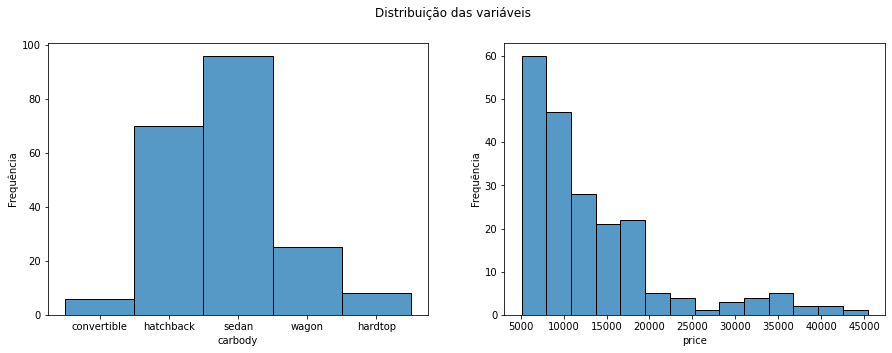

In [33]:
histplot(data=car,
         nrows=1, ncols=2, ax=True,
         ylabel='Frequência', title='Distribuição das variáveis',
        figsize=(15,5)
         )

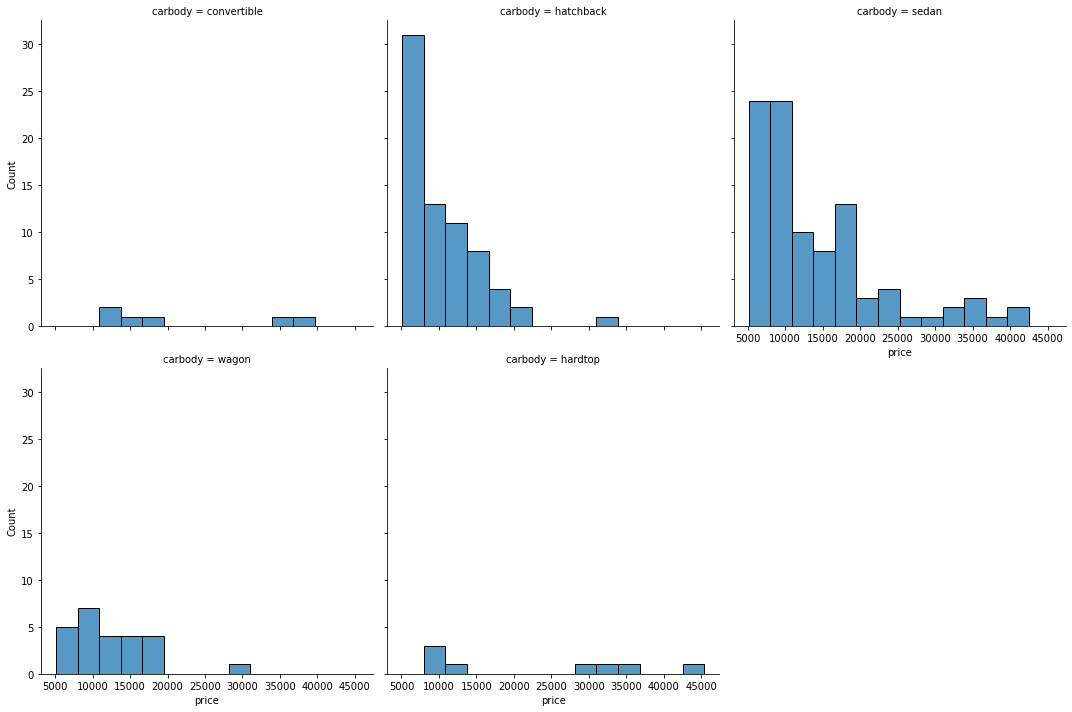

In [34]:
sns.displot(data=car,
             x= 'price',
             col='carbody', kind='hist',
             col_wrap=3)

plt.show()

## 2.3. Transformação da variável categórica

### 2.3.1. Utilizando pandas get_dummies

In [35]:
xGD = pd.get_dummies(car['carbody'], columns=['carbody'])
xGD.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


### 2.3.2. Utilizando o OneHotEncoder

In [36]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(car[['carbody']])

OneHotEncoder(handle_unknown='ignore')

In [37]:
xOHE = pd.DataFrame(enc.transform(car[['carbody']]).toarray().astype(int), columns=enc.categories_)
xOHE.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


## 2.4. Treinamento e validação do modelo

### 2.4.1. Dividir o dataset

In [38]:
y = car['price']

In [39]:
x_Train, x_Test, y_Train, y_Test = train_test_split(xOHE, y, test_size=0.2)

data = (x_Train, x_Test, y_Train, y_Test)

for d in data:
    d.reset_index(drop=True, inplace=True)

### 2.4.2. Treinar o modelo

In [40]:
reg = LinearRegression().fit(x_Train, y_Train)

c:\Users\bruna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


### 2.4.3. Testar o modelo

In [42]:
y_car = reg.predict(x_Test)

pred_car = predict_table(y=y_Test, y_pred=pd.DataFrame(y_car), residual=True)
pred_car.head()

c:\Users\bruna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Real,Previsto,Res
0,6938.0,14864.128205,-7926.128205
1,9233.0,14864.128205,-5631.128205
2,5348.0,10859.705135,-5511.705135
3,6855.0,10859.705135,-4004.705135
4,7799.0,10859.705135,-3060.705135


### 2.4.4. Qualidade de ajuste

In [43]:
adj_quality(pred_car, 'car', form=True, reg=reg)

(        R²           MSE      RMSE
 car -0.015  4.443763e+07  6666.156,
 'y = 16738.52303158508 + 7211.076968414917 x')

### 2.4.5. Visualização do modelo

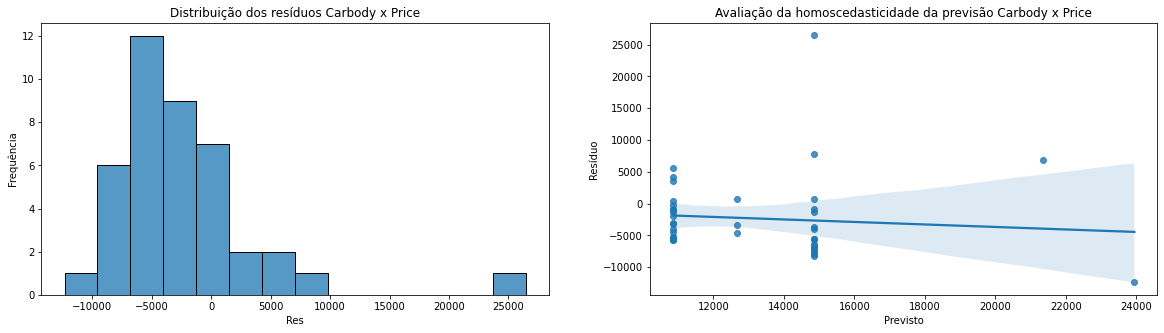

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

sns.histplot(data=pred_car, 
             x='Res', 
             ax=axes[0]).set_ylabel('Frequência')
axes[0].set_title('Distribuição dos resíduos Carbody x Price')

sns.regplot(data=pred_car, 
            x='Previsto', 
            y='Res', 
            ax=axes[1]).set_ylabel('Resíduo')
axes[1].set_title('Avaliação da homoscedasticidade da previsão Carbody x Price')

plt.show()

# 3. Ordinary Least Squares
Este [dataset](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) é um conjunto de dados fornecidos no [Kaggle](https://www.kaggle.com/), uma plataforma voltada a competição de programação e acesso à conjunto de dados de todo o mundo. É totalmente gratuito e apresenta uma forte comunidade de Cientistas de Dados e Machine Learning.

Sobre os dados, eles foram criados coletando dados sobre o consumo de cerveja na cidade de São Paulo na uma área universitária, cujos frequentadores eram, em sua média, estudantes entre 18 e 28 anos.

Esse dataset, apresenta as categorias como:

| Descrição
| ---
| Dia que o dado foi anotado
| Temperatura média do dia em ºC
| Temperatura mínima do dia em ºC
| Temperatura máxima do dia em ºC
| Quantos mm chuva caiu naquele dia
| Verificar se for Sábado ou Domingo
| Consumo de cerveja em litros

Neste exercício você deve:
- Importar os dados e criar o Dataframe
- Realizar a limpeza e manipulação dos dados
- Realizar um EDA
- Encontrar a correlação do consumo com a temperatura máxima
- Treinar o modelo de Regressão Linear **Ordinary Least Squares** utilizando a **temp_max**.

## 3.1. Importar os dados

In [45]:
cerv = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/Regression-SupervisedModels-Course/main/dataset/Consumo_cerveja.csv')

In [46]:
cerv.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


## 3.2. Data Understanding

Existem muitos valores nulos dentro do dataset que precisam ser limpos.

Renomear as colunas também será necessário para evitar erros de transformação.

**Atributo**          | **Descrição**                      | **Tipo** | **Ação**
--------------------- | ------------------------------     | -------- | :----
Data                  | Data da observação                 | Object   | Converter em datetime
Temperatura Media (C) | Temperatura média do dia em °C     | Object   | Substituir **,** por **.** e converter para float
Temperatura Minima (C)| Temperatura mínima do dia em °C    | Object   | Substituir **,** por **.** e converter para float
Temperatura Maxima (C)| Temperatura máxima do dia em °C    | Object   | Substituir **,** por **.** e converter para float
Precipitação (mm)     | Precipitação do dia em mm          | Object   | Substituir **,** por **.** e converter para float
Final de Semana       | Indica se a data é final de semana | Float    | Ok
Consumo de cerveja (litros) | Consumo de cerveja em litros no dia | Float | Multiplicar coluna por 1000 para atingir a unidade de medida

In [47]:
cerv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [48]:
cerv.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Data,365,365,2015-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperatura Media (C),365,277,"22,76",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperatura Minima (C),365,110,"19,3",11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperatura Maxima (C),365,151,28,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precipitacao (mm),365,93,0,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final de Semana,365.0,NaN,NaN,NaN,0.284932,0.452001,0.0,0.0,0.0,1.0,1.0
Consumo de cerveja (litros),365.0,NaN,NaN,NaN,25.401367,4.399143,14.343,22.008,24.867,28.631,37.937


## 3.3. Data Preparation

* Renomear colunas
* Formatar os dados
* Remover os dados nulos e duplicados

In [49]:
cerv.rename(columns={
    'Temperatura Media (C)': 'Temp_Med',
    'Temperatura Minima (C)': 'Temp_Min',
    'Temperatura Maxima (C)': 'Temp_Max',
    'Precipitacao (mm)': 'Precip',
    'Final de Semana': 'FDS',
    'Consumo de cerveja (litros)': 'Consumo_kLit'
    }, inplace=True)

cerv.head()

,Data,Temp_Med,Temp_Min,Temp_Max,Precip,FDS,Consumo_kLit
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


### 3.3.1. Formatação e ajuste dos dados

Alterar **,** por **.**

In [50]:
num = ['Temp_Med', 'Temp_Min', 'Temp_Max', 'Precip']

for n in num:
    cerv[n] = cerv[n].str.replace(',', '.').astype(float)

Multiplicar **Consumo_kLit** por 1000

In [51]:
cerv['Consumo_Lit'] = cerv['Consumo_kLit'].apply(lambda x: x * 1000)

Ajuste dos dados

In [52]:
cerv['Data'] = cerv['Data'].astype('datetime64[ns]')

### 3.3.2. Remoção de valores nulos

In [53]:
cerv.dropna(axis='index', how='all', inplace=True)

In [54]:
cerv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Temp_Med      365 non-null    float64       
 2   Temp_Min      365 non-null    float64       
 3   Temp_Max      365 non-null    float64       
 4   Precip        365 non-null    float64       
 5   FDS           365 non-null    float64       
 6   Consumo_kLit  365 non-null    float64       
 7   Consumo_Lit   365 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 25.7 KB


### 3.3.3. Remoção de valores duplicados

In [55]:
cerv.drop_duplicates(inplace=True)

In [56]:
cerv.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
Data,365,2015-07-02 00:00:00,2015-01-01 00:00:00,2015-04-02 00:00:00,2015-07-02 00:00:00,2015-10-01 00:00:00,2015-12-31 00:00:00,NaN
Temp_Med,365.0,21.226356,12.9,19.02,21.38,23.28,28.86,3.180108
Temp_Min,365.0,17.46137,10.6,15.3,17.9,19.6,24.5,2.826185
Temp_Max,365.0,26.611507,14.5,23.8,26.9,29.4,36.5,4.317366
Precip,365.0,5.196712,0.0,0.0,0.0,3.2,94.8,12.417844
FDS,365.0,0.284932,0.0,0.0,0.0,1.0,1.0,0.452001
Consumo_kLit,365.0,25.401367,14.343,22.008,24.867,28.631,37.937,4.399143
Consumo_Lit,365.0,25401.367123,14343.0,22008.0,24867.0,28631.0,37937.0,4399.142703


## 3.4. Análise Exploratória dos Dados

### 3.4.1. Distribuição das variáveis

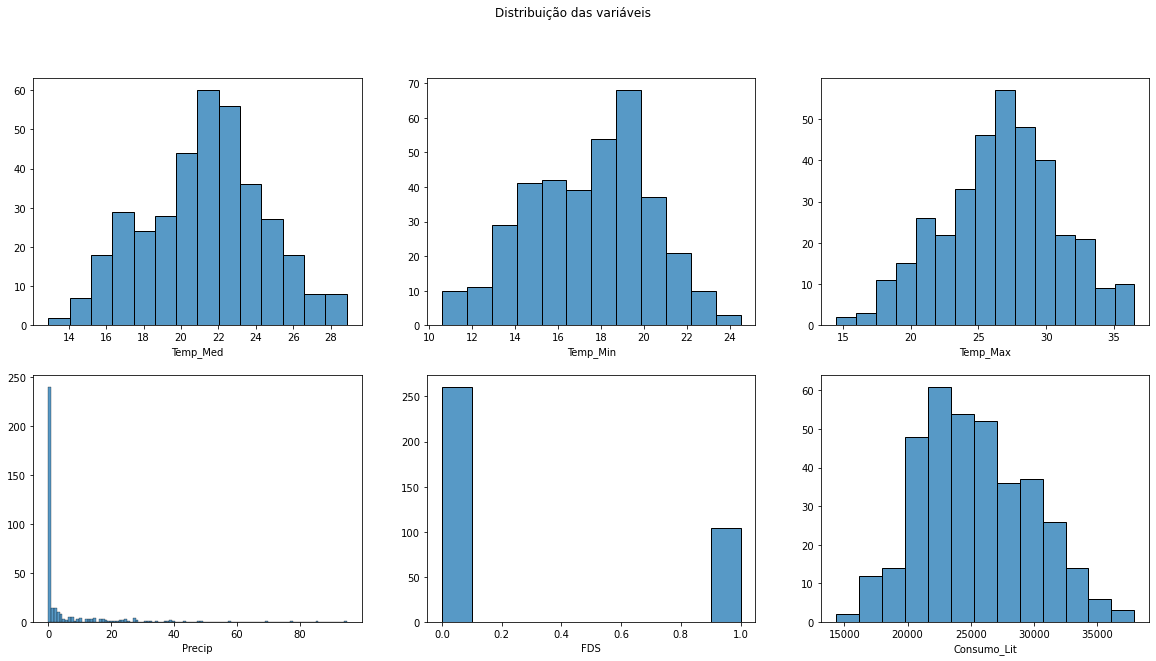

In [57]:
histplot(data=cerv[['Temp_Med', 'Temp_Min', 'Temp_Max', 'Precip', 'FDS', 'Consumo_Lit']],
         figsize=(20,10),
         ax=True, nrows=2, ncols=3,
         title='Distribuição das variáveis')

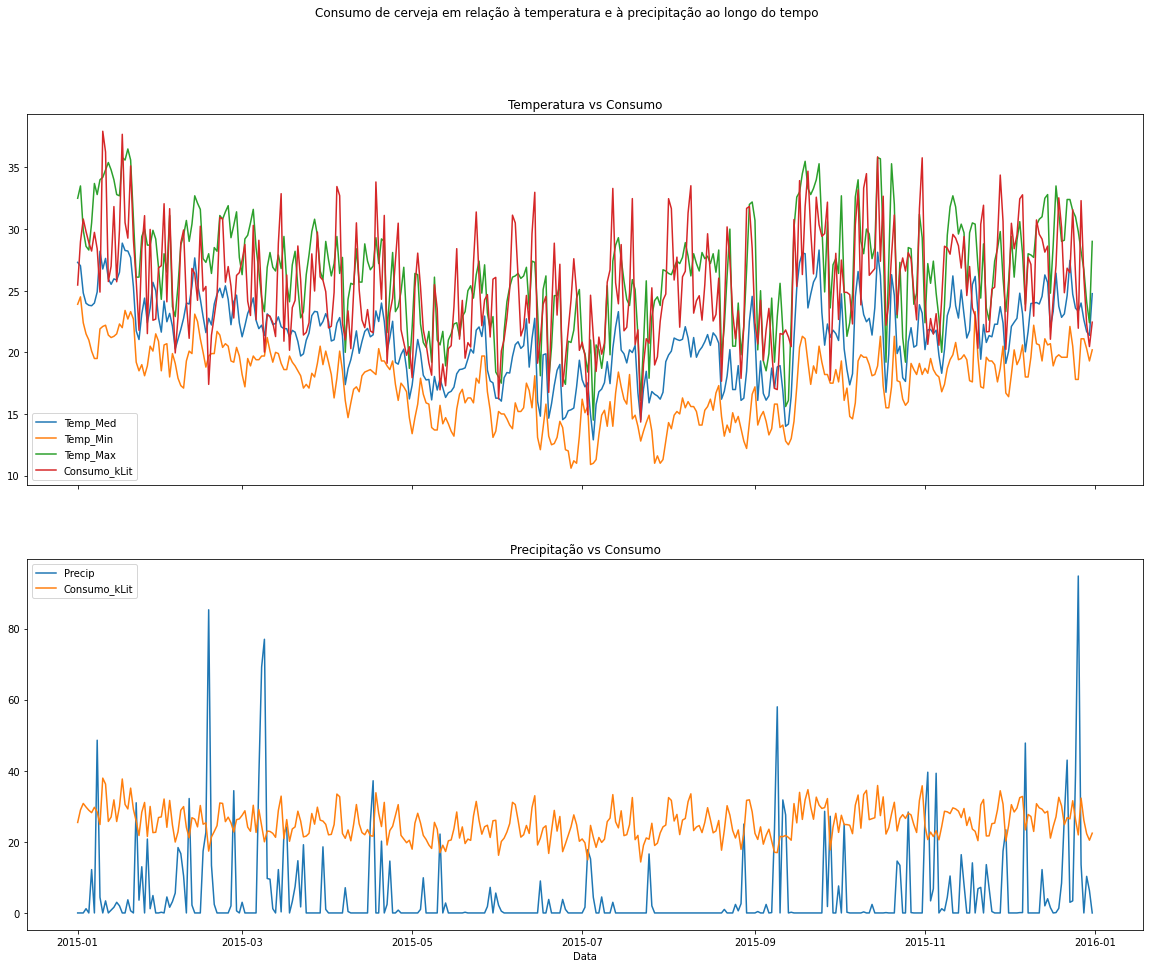

In [58]:
fig, ax = plt.subplots(2,1, figsize=(20,15), sharex=True)


for y in ['Temp_Med', 'Temp_Min', 'Temp_Max', 'Consumo_kLit']:
    sns.lineplot(data=cerv,
                x='Data', 
                y=y, 
                ax=ax[0]
                ).set_ylabel('')
ax[0].legend(labels=['Temp_Med', 'Temp_Min', 'Temp_Max', 'Consumo_kLit'])
ax[0].set_title('Temperatura vs Consumo')


for y in ['Precip', 'Consumo_kLit']:
    sns.lineplot(data=cerv,
                x='Data', 
                y=y, 
                ax=ax[1]
                ).set_ylabel('')
ax[1].legend(labels=['Precip', 'Consumo_kLit'])
ax[1].set_title('Precipitação vs Consumo')

plt.suptitle('Consumo de cerveja em relação à temperatura e à precipitação ao longo do tempo')
plt.show()

### 3.4.2. Correlação entre as variáveis

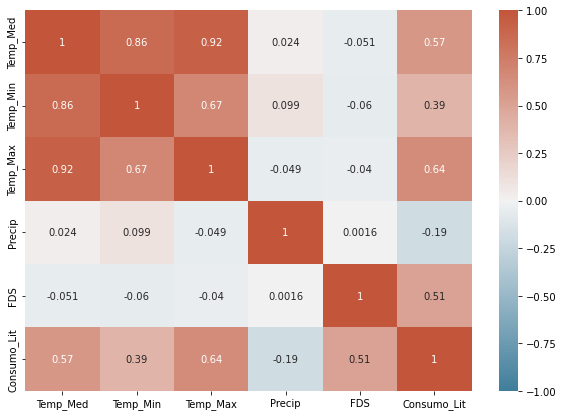

In [59]:
corrplot(cerv.drop(columns='Consumo_kLit'))

## 3.5. Treinamento e validação do modelo

### 3.5.1. Dividir o dataset

In [60]:
x = cerv[['Temp_Max']]
y = cerv[['Consumo_Lit']]

In [61]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, train_size=0.8, random_state=75)

data = (x_Train, x_Test, y_Train, y_Test)

for d in data:
    d.reset_index(drop=True, inplace=True)

### 3.5.2. Treinar o modelo

In [62]:
regOLS = LinearRegression().fit(x_Train, y_Train)

### 3.5.3. Testar o modelo

In [63]:
y_OLS = regOLS.predict(x_Test)

pred_OLS = predict_table(y=y_Test, y_pred=pd.DataFrame(y_OLS), residual=True)
pred_OLS.head()

,Real,Previsto,Res
0,22039.0,25824.538592,-3785.538592
1,20681.0,21055.115533,-374.115533
2,23243.0,22349.673221,893.326779
3,32589.0,30457.692421,2131.307579
4,20738.0,19488.019385,1249.980615


### 3.5.4. Qualidade de ajuste

In [64]:
adj_OLS = adj_quality(pred_OLS, 'OLS')
adj_OLS

,R²,MSE,RMSE
OLS,0.355,1.077838e+07,3283.044


### 3.5.5. Visualização do modelo

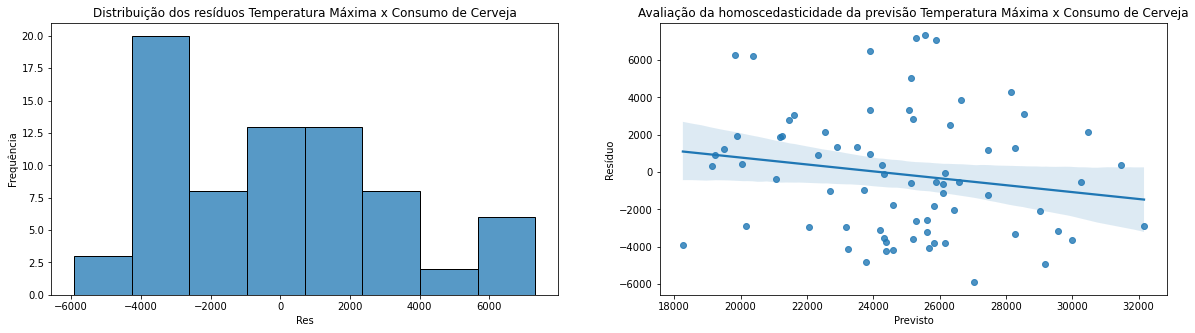

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

sns.histplot(data=pred_OLS, 
             x='Res', 
             ax=axes[0]).set_ylabel('Frequência')
axes[0].set_title('Distribuição dos resíduos Temperatura Máxima x Consumo de Cerveja')

sns.regplot(data=pred_OLS, 
            x='Previsto', 
            y='Res', 
            ax=axes[1]).set_ylabel('Resíduo')
axes[1].set_title('Avaliação da homoscedasticidade da previsão Temperatura Máxima x Consumo de Cerveja')

plt.show()

# 4. Regressão Linear Múltipla

Iremos realizar a mesma análise do exercício de OL (3) com o [dataset](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo) de consumo de cerveja na Cidade de São Paulo.

Além das etapas do exercício anterior, neste exercício você deve:
- Treinar um modelo de regressão múltipla
- Tratar e transformar o dados
- Otimizar o modelo


 ## 4.1. Treinamento e validação do modelo
 A coluna **data** é apenas um índice que nos auxilia a visualizar a evolução do consumo ao longo do tempo, porém ela não é utilizada nos transformadores e nem no treinamento / validação do modelo.

### 4.1.1. Dividir o dataset

In [66]:
x = cerv.drop(columns=['Consumo_kLit', 'Consumo_Lit'])
y = cerv[['Consumo_kLit']]

In [67]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, train_size=0.8, random_state=75)

data = (x_Train, x_Test, y_Train, y_Test)

for d in data:
    d.reset_index(drop=True, inplace=True)

In [68]:
x_Train.head()

,Data,Temp_Med,Temp_Min,Temp_Max,Precip,FDS
0,2015-08-16,20.56,16.2,27.2,0.0,1.0
1,2015-01-08,24.90,19.5,32.8,48.6,0.0
2,2015-12-06,23.12,20.6,28.0,0.1,1.0
3,2015-12-21,23.12,19.6,29.1,27.2,0.0
4,2015-07-11,17.46,16.0,19.8,0.0,1.0


### 4.1.2. Transformar **x** para StandardScaler()

In [70]:
norm = StandardScaler().fit_transform(x_Train.iloc[:,1:].copy())
x_Train_norm = pd.DataFrame(norm)
x_Train_norm.columns = x_Train.iloc[:,1:].columns

norm = StandardScaler().fit_transform(x_Test.iloc[:,1:].copy())
x_Test_norm = pd.DataFrame(norm)
x_Test_norm.columns = x_Test.iloc[:,1:].columns

x_Train_norm.head()

,Temp_Med,Temp_Min,Temp_Max,Precip,FDS
0,-0.278386,-0.512593,0.084390,-0.425067,1.586843
1,1.116713,0.680485,1.408720,3.231927,-0.630182
2,0.544529,1.078178,0.273580,-0.417542,1.586843
3,0.544529,0.716639,0.533717,1.621646,-0.630182
4,-1.274884,-0.584900,-1.665617,-0.425067,1.586843


### 4.1.3. Transformar **x** para MinMaxScaler()

In [71]:
minmax = MinMaxScaler().fit_transform(x_Train.iloc[:,1:].copy())
x_Train_minmax = pd.DataFrame(minmax)
x_Train_minmax.columns = x_Train.iloc[:,1:].columns

minmax = MinMaxScaler().fit_transform(x_Test.iloc[:,1:].copy())
x_Test_minmax = pd.DataFrame(minmax)
x_Test_minmax.columns = x_Test.iloc[:,1:].columns

x_Train_minmax.head()

,Temp_Med,Temp_Min,Temp_Max,Precip,FDS
0,0.479950,0.385185,0.596244,0.000000,1.0
1,0.751880,0.629630,0.859155,0.512658,0.0
2,0.640351,0.711111,0.633803,0.001055,1.0
3,0.640351,0.637037,0.685446,0.286920,0.0
4,0.285714,0.370370,0.248826,0.000000,1.0


### 4.1.4. Treinar os modelos

In [72]:
regLR = LinearRegression().fit(x_Train.iloc[:,1:], y_Train)
regNorm = LinearRegression().fit(x_Train_norm, y_Train)
regMinmax = LinearRegression().fit(x_Train_minmax, y_Train)

### 4.1.5. Testar os modelos

In [73]:
y_LR = regLR.predict(x_Test.iloc[:,1:])

pred_LR = predict_table(y=y_Test,
                        y_pred=pd.DataFrame(y_LR),
                        residual=True)
pred_LR.head()

,Real,Previsto,Res
0,22.039,24.723600,-2.684600
1,20.681,19.848410,0.832590
2,23.243,21.142410,2.100590
3,32.589,29.376806,3.212194
4,20.738,22.577676,-1.839676


In [74]:
y_norm = regNorm.predict(x_Test_norm)

pred_norm = predict_table(y=y_Test,
                        y_pred=pd.DataFrame(y_norm),
                        residual=True)
pred_norm.head()

,Real,Previsto,Res
0,22.039,25.447140,-3.408140
1,20.681,20.858119,-0.177119
2,23.243,22.044591,1.198409
3,32.589,29.810486,2.778514
4,20.738,23.002445,-2.264445


In [75]:
y_minmax = regLR.predict(x_Test_minmax)

pred_minmax = predict_table(y=y_Test,
                        y_pred=pd.DataFrame(y_minmax),
                        residual=True)
pred_minmax.head()

,Real,Previsto,Res
0,22.039,6.533528,15.505472
1,20.681,6.289959,14.391041
2,23.243,6.356026,16.886974
3,32.589,6.764499,25.824501
4,20.738,11.375511,9.362489


### 4.1.6. Qualidade de ajuste

In [76]:
adjLR, foLR = adj_quality(pred_LR, 'Sem transformação', form=True, reg=regLR)
adjLR

,R²,MSE,RMSE
Sem transformação,0.704,4.956,2.226


In [77]:
foLR

'y = [6.16138335] + [ 0.05198575 -0.03504732  0.6617024  -0.05541184  5.18728834] x'

In [78]:
adjNorm, foNorm = adj_quality(pred_norm, 'Transformação Standard', form=True, reg=regNorm)
adjNorm

,R²,MSE,RMSE
Transformação Standard,0.667,5.565,2.359


In [79]:
foNorm

'y = [25.58140068] + [ 0.16172206 -0.0969393   2.7980446  -0.73640132  2.33975146] x'

In [80]:
adjMinmax, foMinmax = adj_quality(pred_minmax, 'Transformação MinMax', form=True, reg=regMinmax)
adjMinmax

,R²,MSE,RMSE
Transformação MinMax,-16.437,291.459,17.072


In [81]:
foMinmax

'y = [16.04116379] + [ 0.82969252 -0.47313884 14.09426118 -5.25304253  5.18728834] x'

### 4.1.7. Visualização dos modelos

Text(0.5, 1.0, 'Avaliação da homoscedasticidade do Consumo de Cerveja - Transformação Normal')

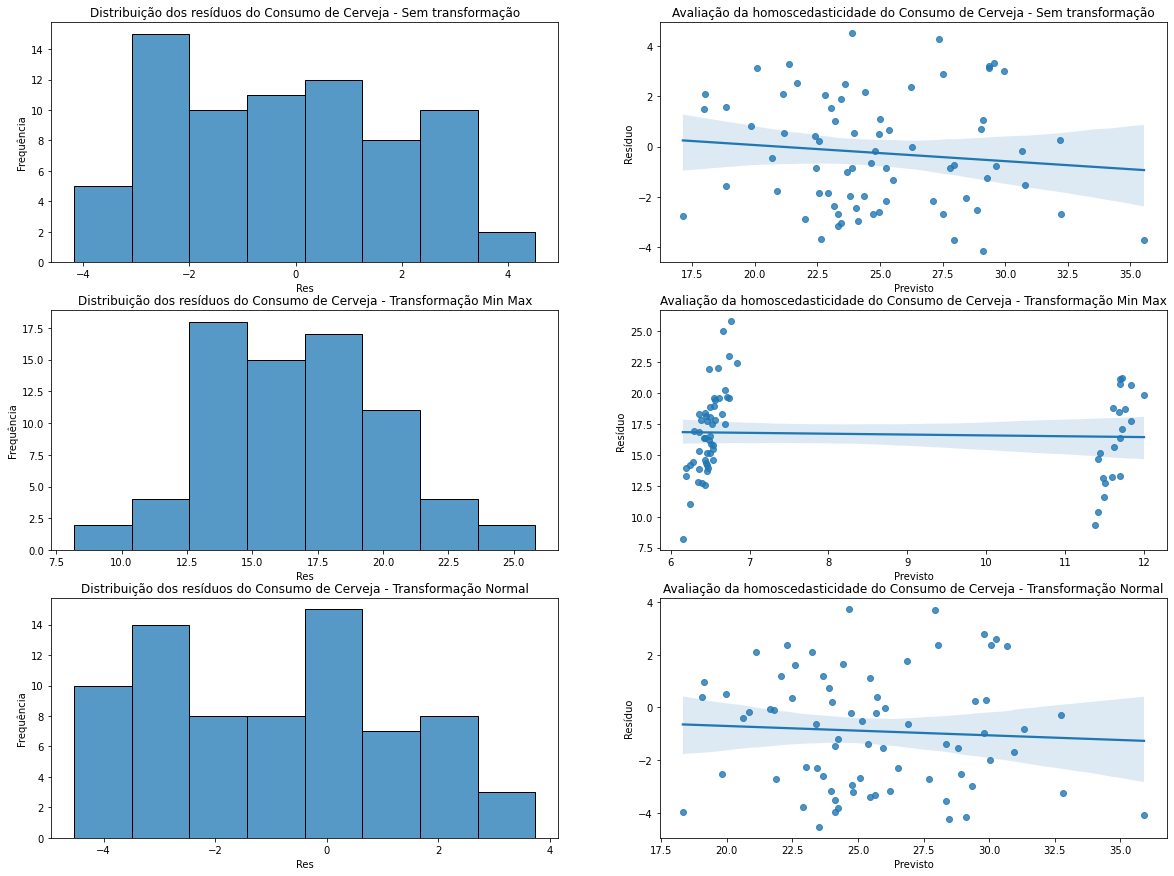

In [82]:
fig, axes = plt.subplots(3, 2, figsize=(20,15))

sns.histplot(data=pred_LR, x='Res', ax=axes[0,0]).set_ylabel('Frequência')
axes[0,0].set_title('Distribuição dos resíduos do Consumo de Cerveja - Sem transformação')

sns.regplot(data=pred_LR, x='Previsto', y='Res', ax=axes[0,1]).set_ylabel('Resíduo')
axes[0,1].set_title('Avaliação da homoscedasticidade do Consumo de Cerveja - Sem transformação')


sns.histplot(data=pred_minmax, x='Res', ax=axes[1,0]).set_ylabel('Frequência')
axes[1,0].set_title('Distribuição dos resíduos do Consumo de Cerveja - Transformação Min Max')

sns.regplot(data=pred_minmax, x='Previsto', y='Res', ax=axes[1,1]).set_ylabel('Resíduo')
axes[1,1].set_title('Avaliação da homoscedasticidade do Consumo de Cerveja - Transformação Min Max')


sns.histplot(data=pred_norm, x='Res', ax=axes[2,0]).set_ylabel('Frequência')
axes[2,0].set_title('Distribuição dos resíduos do Consumo de Cerveja - Transformação Normal')

sns.regplot(data=pred_norm, x='Previsto', y='Res', ax=axes[2,1]).set_ylabel('Resíduo')
axes[2,1].set_title('Avaliação da homoscedasticidade do Consumo de Cerveja - Transformação Normal')

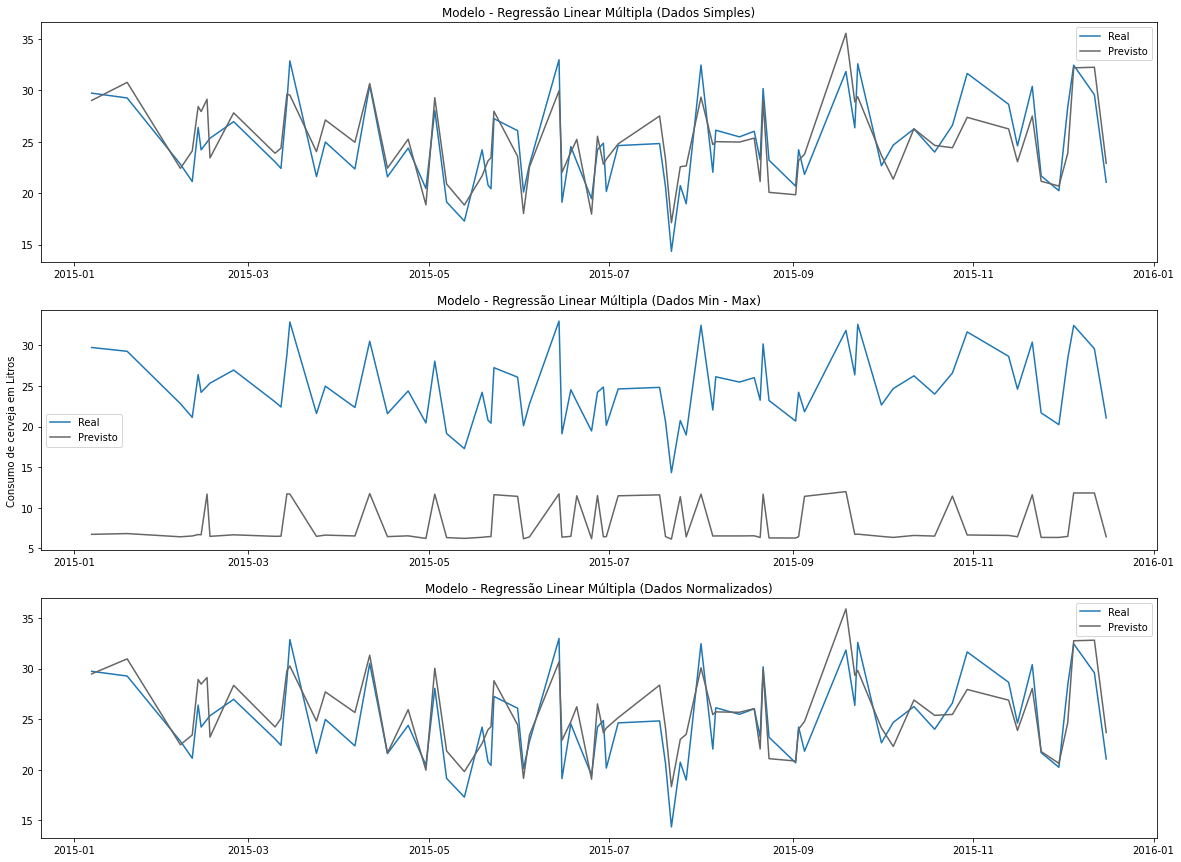

In [84]:
plt.figure(figsize=(20,15))

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.subplot(3,1,1)
plt.plot_date(x='Data',y='Real',data=pd.concat([x_Test, pred_LR], axis=1).sort_values(by=['Data']),fmt='-')
plt.plot_date(x='Data',y='Previsto',data=pd.concat([x_Test, pred_LR], axis=1).sort_values(by=['Data']),fmt='-',color='#666666')
plt.title('Modelo - Regressão Linear Múltipla (Dados Simples)')
plt.legend(['Real', 'Previsto'])

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.subplot(3,1,2)
plt.plot_date(x='Data',y='Real',data=pd.concat([x_Test, pred_minmax], axis=1).sort_values(by=['Data']),fmt='-')
plt.plot_date(x='Data',y='Previsto',data=pd.concat([x_Test, pred_minmax], axis=1).sort_values(by=['Data']),fmt='-',color='#666666')
plt.title('Modelo - Regressão Linear Múltipla (Dados Min - Max)')
plt.ylabel('Consumo de cerveja em Litros')
plt.legend(['Real', 'Previsto'])

color_blue = 'cornflowerblue'
# Visualização do consumo durante todo o ano
plt.subplot(3,1,3)
plt.plot_date(x='Data',y='Real',data=pd.concat([x_Test, pred_norm], axis=1).sort_values(by=['Data']),fmt='-')
plt.plot_date(x='Data',y='Previsto',data=pd.concat([x_Test, pred_norm], axis=1).sort_values(by=['Data']),fmt='-',color='#666666')
plt.title('Modelo - Regressão Linear Múltipla (Dados Normalizados)')
plt.legend(['Real', 'Previsto'])

plt.show()